# drive mount



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#these lines are to unzip a file and save em to my drive
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/A-Dataset-for-Automatic-Violence-Detection-in-Videos-master.rar').extractall('/content/drive/MyDrive')

     |████████████████████████████████| 77 kB 6.8 MB/s 


In [ ]:
#I do quite often have internet issues and I just wanted to make sure my dataset was fully loaded 
! du -sh /content/drive/MyDrive/A-Dataset-for-Automatic-Violence-Detection-in-Videos-master*

867M	/content/drive/MyDrive/A-Dataset-for-Automatic-Violence-Detection-in-Videos-master
867M	/content/drive/MyDrive/A-Dataset-for-Automatic-Violence-Detection-in-Videos-master.rar


# import


In [ ]:
#just my usual imports that i essentialy do for all my projects, dont need all of em but hey i'm lazy to comment em out 
import tensorflow as tf 
import numpy as np 
from tensorflow import keras
import os 
import random 
import cv2


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping 
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import plot_model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, TimeDistributed,Dropout, Activation, Flatten,Conv2D, MaxPooling2D,LSTM,Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D

from keras.layers import Input
from keras.models import Model


# preprocess


In [ ]:
data_dir = r"/content/drive/MyDrive/A-Dataset-for-Automatic-Violence-Detection-in-Videos-master"
img_height , img_width = 90, 90
seq_len = 25
 

In [ ]:
classes = ["non-violent","violent"]


In [ ]:
#  Creating frames from videos

def frames_extraction(video_path):
    frames_list = []
     
    vidObj = cv2.VideoCapture(video_path)
    # Used as counter variable 
    count = 1
 
    while count <= seq_len: 
         
        success, image = vidObj.read() 
        if success:
            image = cv2.resize(image, (img_height, img_width))
            frames_list.append(image)
            count += 1
        else:
            print("Defected frame")
            break
 
            
    return frames_list

In [ ]:
#usual dataset creations that we've known and loved from sentdex's tutorial
def create_data(input_dir):
    X = []
    Y = []
     
    classes_list = os.listdir(input_dir)
     
    for c in classes_list:
        print(c)
        files_list = os.listdir(os.path.join(input_dir, c))
        for f in files_list:
           frames = frames_extraction(os.path.join(os.path.join(input_dir, c), f))
           if len(frames) == seq_len:
                
                X.append(frames)
             
                y = [0]*len(classes)
                y[classes.index(c)] = 1
                Y.append(y)
     
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y
X, Y = create_data(data_dir)

non-violent
violent


In [ ]:

X = X.astype("float32") / 255.0

In [ ]:
X.shape
#Y.shape

(291, 25, 90, 90, 3)

In [ ]:
np.save('/content/drive/MyDrive/saved numpy/violance_X',X)
np.save('/content/drive/MyDrive/saved numpy/violance_Y',Y)

In [ ]:
X= np.load('/content/drive/MyDrive/428/violance_X.npy')
Y=np.load('/content/drive/MyDrive/428/violance_Y.npy')

In [ ]:
np.random.seed(1337)

# convlstm2d

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters = 32, kernel_size = (3, 3), return_sequences = False, padding='same', input_shape = (seq_len, img_height, img_width, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 100, 100, 32)      40448     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                20480064  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 20,520,642
Trainable params: 20,520,642
Non-trainable params: 0
____________________________________________

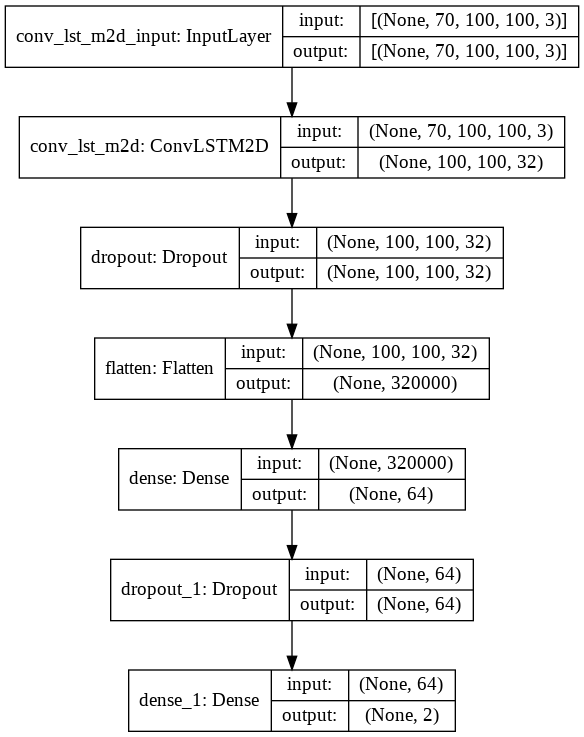

In [ ]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, shuffle=True, random_state=0)

In [ ]:
epochs=25

In [ ]:
opt ="Adam"
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
earlystop = EarlyStopping(patience=4)
callbacks = [earlystop]

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=epochs, batch_size = 5 , shuffle=True, validation_split=0.10, callbacks=callbacks)

Epoch 1/25
47/47 [==============================] - 128s 2s/step - loss: 2.2353 - accuracy: 0.6581 - val_loss: 0.4478 - val_accuracy: 0.8519
Epoch 2/25
47/47 [==============================] - 97s 2s/step - loss: 0.4416 - accuracy: 0.8077 - val_loss: 0.3625 - val_accuracy: 0.8148
Epoch 3/25
47/47 [==============================] - 96s 2s/step - loss: 0.3586 - accuracy: 0.8462 - val_loss: 0.3641 - val_accuracy: 0.8889
Epoch 4/25
47/47 [==============================] - 97s 2s/step - loss: 0.3004 - accuracy: 0.8632 - val_loss: 0.2903 - val_accuracy: 0.9259
Epoch 5/25
47/47 [==============================] - 97s 2s/step - loss: 0.3361 - accuracy: 0.8504 - val_loss: 0.3017 - val_accuracy: 0.8889
Epoch 6/25
47/47 [==============================] - 97s 2s/step - loss: 0.2633 - accuracy: 0.8974 - val_loss: 0.3154 - val_accuracy: 0.8889
Epoch 7/25
47/47 [==============================] - 96s 2s/step - loss: 0.2158 - accuracy: 0.8932 - val_loss: 0.4131 - val_accuracy: 0.8889
Epoch 8/25
47/47 [=

In [ ]:
convlstm2d_score= model.evaluate(X_test,y_test, batch_size=5, verbose=2)

6/6 - 4s - loss: 0.6543 - accuracy: 0.7000


In [ ]:
y_pred = model.predict(X_test,batch_size=5)

In [ ]:

y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.87      0.91      0.89        22

    accuracy                           0.83        30
   macro avg       0.79      0.77      0.78        30
weighted avg       0.83      0.83      0.83        30



In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

In [ ]:
history_loss, history_accuracy = convlstm2d_score

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history.history[metric_name_1]
  metric_value_2 = history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

In [ ]:
import matplotlib.pyplot as plt


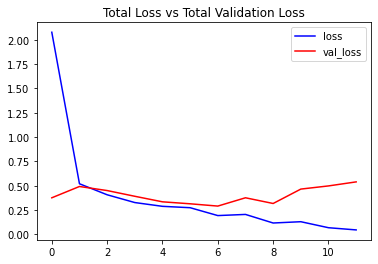

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

# CNN_LSTM(LRCN)

In [ ]:
def build_convnet(shape=(90, 90, 3)):
    
    cnn = Sequential()
    cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    
    cnn.add(Conv2D(256, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    #converting to 1-d tensor
    cnn.add(Flatten())
      


    return cnn

In [ ]:
def convnet_lstm_model(shape=(25, 90, 90, 3), nbout=2):
    convnet = build_convnet(shape[1:])
    model = Sequential()
    model.add(TimeDistributed(convnet, input_shape=shape))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(nbout, activation='softmax'))
    return model

In [ ]:
SIZE = (90,90)
seq_len = 25
CHANNELS = 3
INSHAPE=(seq_len,) + SIZE+ (CHANNELS,)

In [ ]:
model_convnet = convnet_lstm_model(INSHAPE)
model_convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 25, 5184)         483200    
 ibuted)                                                         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               1335552   
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,825,058
Trainable params: 1,825,058
No

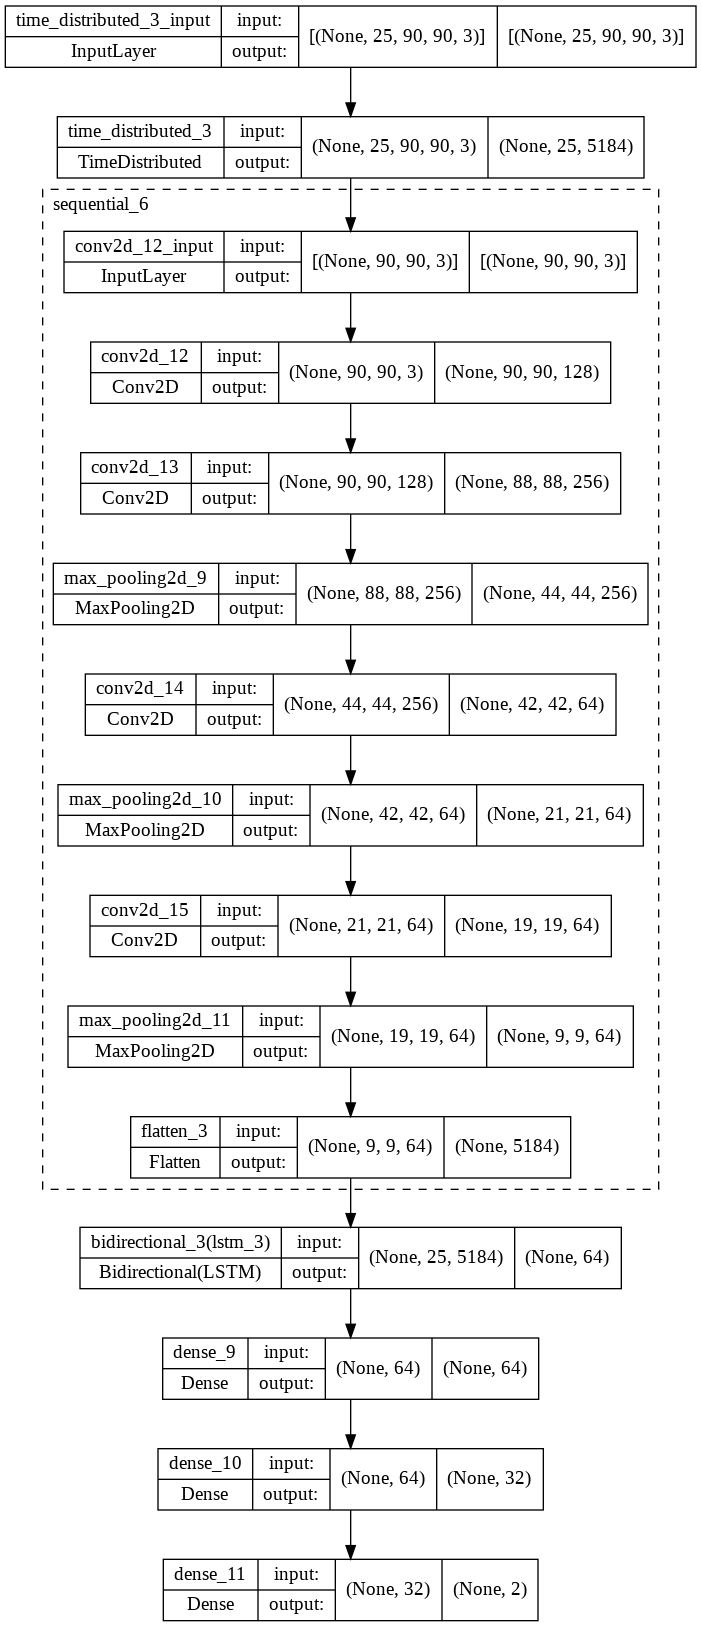

In [ ]:
plot_model(model_convnet,show_shapes=True,expand_nested=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
epochs=50

In [ ]:
epochs=50
opt = keras.optimizers.SGD(lr=0.001 ,momentum = 0.9, decay = 1e-4/epochs)
model_convnet.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:

history = model_convnet.fit(x = X_train, y = y_train, epochs=epochs, batch_size = 8 , shuffle=True, validation_split=0.1,callbacks=callbacks)


Epoch 1/50
30/30 [==============================] - 41s 746ms/step - loss: 0.6822 - accuracy: 0.6154 - val_loss: 0.7276 - val_accuracy: 0.4444
Epoch 2/50
30/30 [==============================] - 19s 622ms/step - loss: 0.6645 - accuracy: 0.6154 - val_loss: 0.7428 - val_accuracy: 0.4444
Epoch 3/50
30/30 [==============================] - 19s 631ms/step - loss: 0.6626 - accuracy: 0.6154 - val_loss: 0.7433 - val_accuracy: 0.4444
Epoch 4/50
30/30 [==============================] - 19s 638ms/step - loss: 0.6565 - accuracy: 0.6154 - val_loss: 0.7415 - val_accuracy: 0.4444
Epoch 5/50
30/30 [==============================] - 19s 647ms/step - loss: 0.6500 - accuracy: 0.6154 - val_loss: 0.7158 - val_accuracy: 0.4444
Epoch 6/50
30/30 [==============================] - 20s 651ms/step - loss: 0.6412 - accuracy: 0.6154 - val_loss: 0.7655 - val_accuracy: 0.4444
Epoch 7/50
30/30 [==============================] - 19s 644ms/step - loss: 0.6459 - accuracy: 0.6538 - val_loss: 0.6880 - val_accuracy: 0.4815

In [ ]:
convnet_score= model_convnet.evaluate(X_test,y_test, batch_size=8, verbose=2)

4/4 - 3s - loss: 0.6866 - accuracy: 0.7333 - 3s/epoch - 706ms/step


In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

y_pred = model_convnet.predict(X_test, batch_size=8)

y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.81      0.87      0.84        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()



In [ ]:
  history_loss, history_accuracy =convnet_score

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history.history[metric_name_1]
  
  metric_value_2 = history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

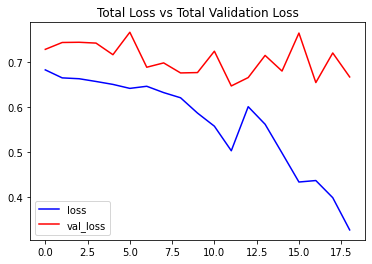

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

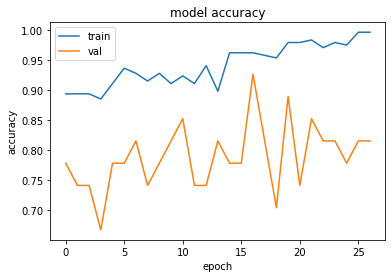

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

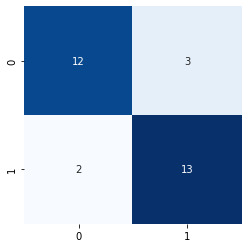

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

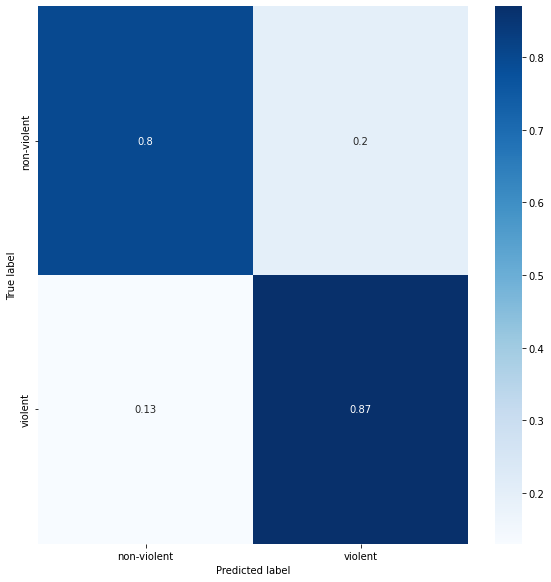

In [ ]:
import pandas as pd
y_true=y_test
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
model_convnet.save("/content/drive/MyDrive/saved model/convnet.h5")

# VGG16-lstm


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers import  TimeDistributed
from keras.layers.wrappers import TimeDistributed
#from keras.optimizers import Nadam

#from tensorflow.keras.layers import Dense, TimeDistributed,Dropout, Activation, Flatten,Conv2D, MaxPooling2D,LSTM,Bidirectional

In [ ]:
video = Input(shape=(seq_len,img_height,img_width,CHANNELS))
                     
cnn_base = VGG16(input_shape=(img_height,img_width,CHANNELS),weights="imagenet",include_top=False)
                 
cnn_out = GlobalAveragePooling2D()(cnn_base.output)

cnn = Model(inputs=cnn_base.input, outputs=cnn_out)


cnn.trainable = False

encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence = LSTM(256)(encoded_frames)
hidden_layer = Dense(256, activation="relu")(encoded_sequence)
outputs = Dense(2, activation="softmax")(hidden_layer)
model = Model([video], outputs)

In [ ]:
epochs=50
opt = keras.optimizers.SGD(lr=0.001 ,momentum = 0.9, decay = 1e-4/epochs)
#model_convnet.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=epochs, batch_size = 8 , shuffle=True, validation_split=0.1,callbacks=callbacks)

Epoch 1/50
30/30 [==============================] - 17s 464ms/step - loss: 0.6713 - accuracy: 0.5897 - val_loss: 0.6558 - val_accuracy: 0.8148
Epoch 2/50
30/30 [==============================] - 13s 441ms/step - loss: 0.6297 - accuracy: 0.6239 - val_loss: 0.6466 - val_accuracy: 0.5185
Epoch 3/50
30/30 [==============================] - 13s 444ms/step - loss: 0.6024 - accuracy: 0.6880 - val_loss: 0.6391 - val_accuracy: 0.5185
Epoch 4/50
30/30 [==============================] - 14s 455ms/step - loss: 0.5586 - accuracy: 0.7436 - val_loss: 0.6181 - val_accuracy: 0.5926
Epoch 5/50
30/30 [==============================] - 13s 445ms/step - loss: 0.5387 - accuracy: 0.7863 - val_loss: 0.6163 - val_accuracy: 0.6296
Epoch 6/50
30/30 [==============================] - 13s 441ms/step - loss: 0.5030 - accuracy: 0.7863 - val_loss: 0.5221 - val_accuracy: 0.7407
Epoch 7/50
30/30 [==============================] - 13s 442ms/step - loss: 0.6052 - accuracy: 0.6239 - val_loss: 0.5944 - val_accuracy: 0.6296

In [ ]:
vgg_score= model.evaluate(X_test,y_test, batch_size=8, verbose=2)

4/4 - 1s - loss: 0.6837 - accuracy: 0.7000 - 1s/epoch - 349ms/step


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()
 

In [ ]:
history_loss, history_accuracy = vgg_score

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history.history[metric_name_1]
  metric_value_2 = history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

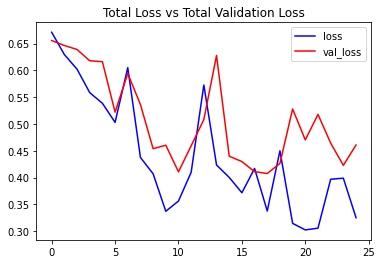

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)


y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.67      0.80      0.73        15

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.70        30
weighted avg       0.71      0.70      0.70        30



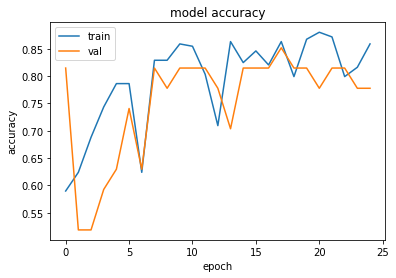

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

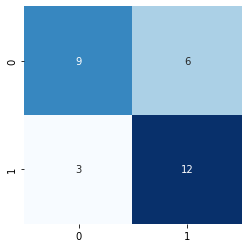

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

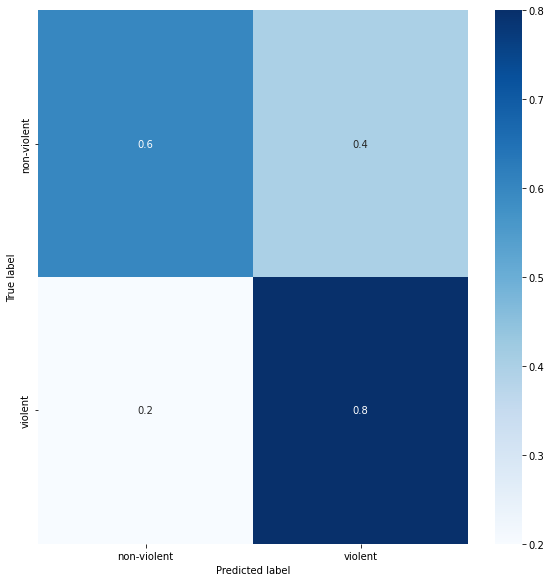

In [ ]:
import pandas as pd
y_true=y_test
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from keras.layers.wrappers import Bidirectional

In [ ]:
video = Input(shape=(seq_len,img_height,img_width,CHANNELS))
                     
cnn_base = VGG16(input_shape=(img_height,img_width,CHANNELS),weights="imagenet",include_top=False)
                 
cnn_out = GlobalAveragePooling2D()(cnn_base.output)

cnn = Model(inputs=cnn_base.input, outputs=cnn_out)


cnn.trainable = False

encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence =Bidirectional(LSTM(256))(encoded_frames)
hidden_layer = Dense(256, activation="relu")(encoded_sequence)
outputs = Dense(2, activation="softmax")(hidden_layer)
model = Model([video], outputs)

In [ ]:
epochs=50
opt = keras.optimizers.SGD(lr=0.001 ,momentum = 0.9, decay = 1e-4/epochs)
#model_convnet.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=epochs, batch_size = 8 , shuffle=True, validation_split=0.1,callbacks=callbacks)

Epoch 1/50
30/30 [==============================] - 27s 702ms/step - loss: 0.6764 - accuracy: 0.6282 - val_loss: 0.6394 - val_accuracy: 0.5926
Epoch 2/50
30/30 [==============================] - 20s 677ms/step - loss: 0.6097 - accuracy: 0.6496 - val_loss: 0.5978 - val_accuracy: 0.7407
Epoch 3/50
30/30 [==============================] - 20s 685ms/step - loss: 0.5722 - accuracy: 0.6923 - val_loss: 0.6944 - val_accuracy: 0.4444
Epoch 4/50
30/30 [==============================] - 21s 689ms/step - loss: 0.5264 - accuracy: 0.7436 - val_loss: 0.6115 - val_accuracy: 0.5926
Epoch 5/50
30/30 [==============================] - 20s 678ms/step - loss: 0.4785 - accuracy: 0.8077 - val_loss: 0.6013 - val_accuracy: 0.7037
Epoch 6/50
30/30 [==============================] - 20s 671ms/step - loss: 0.4509 - accuracy: 0.8419 - val_loss: 0.5534 - val_accuracy: 0.7407
Epoch 7/50
30/30 [==============================] - 20s 684ms/step - loss: 0.4202 - accuracy: 0.8376 - val_loss: 0.5063 - val_accuracy: 0.7778

In [ ]:
vgg_score2= model.evaluate(X_test,y_test, batch_size=8, verbose=2)

4/4 - 1s - loss: 0.8689 - accuracy: 0.7333 - 1s/epoch - 327ms/step


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)


y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.68      0.87      0.76        15

    accuracy                           0.73        30
   macro avg       0.75      0.73      0.73        30
weighted avg       0.75      0.73      0.73        30



In [ ]:
history_loss, history_accuracy = vgg_score2

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history.history[metric_name_1]
  metric_value_2 = history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

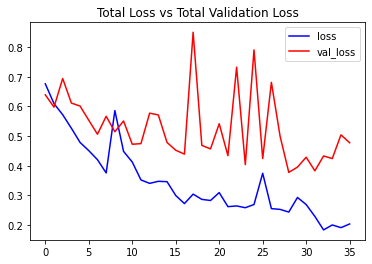

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

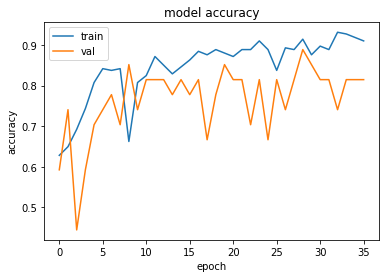

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

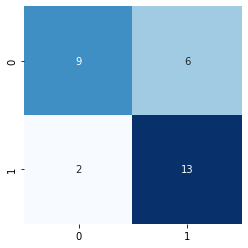

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

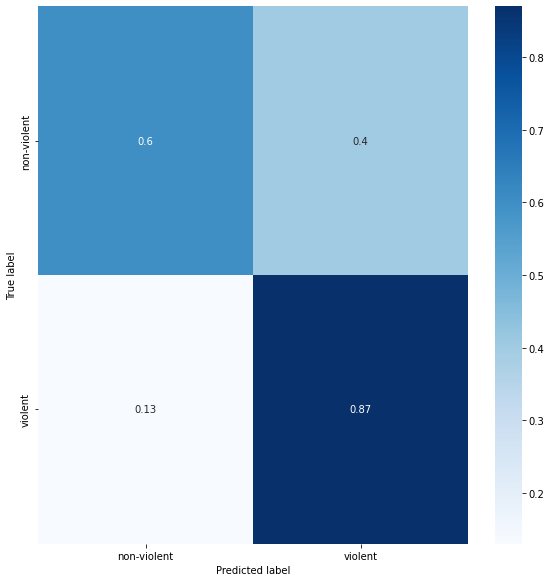

In [ ]:
import pandas as pd
y_true=y_test
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#efficient-lstm

In [ ]:
CHANNELS=3

In [ ]:
from keras.applications.efficientnet import EfficientNetB7

In [ ]:
video = Input(shape=(seq_len,img_height,img_width,CHANNELS))
                     
cnn_base = EfficientNetB7(input_shape=(img_height,img_width,CHANNELS),weights="imagenet",include_top=False)
                 
cnn_out = GlobalAveragePooling2D()(cnn_base.output)

cnn = Model(inputs=cnn_base.input, outputs=cnn_out)


cnn.trainable = False

encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence =Bidirectional(LSTM(128))(encoded_frames)
hidden_layer = Dense(64, activation="relu")(encoded_sequence)
outputs = Dense(2, activation="softmax")(hidden_layer)
model = Model([video], outputs)

258088960/258076736 [==============================] - 3s 0us/step


In [ ]:
opt = 'Adam'
#model_convnet.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]
epochs=25

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=epochs, batch_size = 8 , shuffle=True, validation_split=0.1,callbacks=callbacks)

Epoch 1/25
30/30 [==============================] - 195s 4s/step - loss: 0.7173 - accuracy: 0.5043 - val_loss: 0.6890 - val_accuracy: 0.5926
Epoch 2/25
30/30 [==============================] - 109s 4s/step - loss: 0.6895 - accuracy: 0.5470 - val_loss: 0.6819 - val_accuracy: 0.5926
Epoch 3/25
30/30 [==============================] - 109s 4s/step - loss: 0.7107 - accuracy: 0.5085 - val_loss: 0.6765 - val_accuracy: 0.5926
Epoch 4/25
30/30 [==============================] - 109s 4s/step - loss: 0.6888 - accuracy: 0.5684 - val_loss: 0.6865 - val_accuracy: 0.5926
Epoch 5/25
30/30 [==============================] - 109s 4s/step - loss: 0.6959 - accuracy: 0.5342 - val_loss: 0.6797 - val_accuracy: 0.5926
Epoch 6/25
30/30 [==============================] - 109s 4s/step - loss: 0.6961 - accuracy: 0.5385 - val_loss: 0.6918 - val_accuracy: 0.5926
Epoch 7/25
30/30 [==============================] - 109s 4s/step - loss: 0.6854 - accuracy: 0.5256 - val_loss: 0.6759 - val_accuracy: 0.5926
Epoch 8/25
30

In [ ]:
effcient= model.evaluate(X_test,y_test, batch_size=8, verbose=2)

4/4 - 18s - loss: 0.6824 - accuracy: 0.7333


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=8)


y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.73      1.00      0.85        22

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()


In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history.history[metric_name_1]
  metric_value_2 = history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()  

In [ ]:
history_loss, history_accuracy = effcient
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

NameError: ignored

#3dCNN


In [ ]:

def get_model():

    model = Sequential()
    inputShape=(25, 90, 90,3)  #seq_length, width, height, channels

    inputs = Input(inputShape)



        # 1st layer group
    conv1_3d=Conv3D(64, (3, 3, 3), activation='relu', padding='same',strides=(1, 1, 1))
    pool1_3d=MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), padding='valid')
  
    
    # 3rd layer group
    conv3a_3d=Conv3D(32, (3, 3, 3), activation='relu', padding='same',strides=(1, 1, 1))

    pool3_3d=MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='valid',)







    dense1_3d=Dense(32, activation='relu')
    model.add(Dropout(.5))
    dense2_3d=Dense(32, activation='relu')
    model.add(Dropout(.5))
    dense3_3d=Dense(2, activation='softmax')


    x=conv1_3d(inputs)
    x=pool1_3d(x)
 

    x=conv3a_3d(x)

    x=pool3_3d(x)



    x = Flatten()(x)
    x=dense1_3d(x)
    x = Dropout(0.5)(x)
    x=dense2_3d(x)
    x = Dropout(0.5)(x)
    x=dense3_3d(x)



    model = Model(inputs, x)

    return model


model = get_model()
model.summary()
 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25, 90, 90, 3)]   0         
                                                                 
 conv3d_2 (Conv3D)           (None, 25, 90, 90, 64)    5248      
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 25, 45, 45, 64)   0         
 3D)                                                             
                                                                 
 conv3d_3 (Conv3D)           (None, 25, 45, 45, 32)    55328     
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 12, 22, 22, 32)   0         
 3D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 185856)            0   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, shuffle=True, random_state=0)

In [ ]:
epochs=50

In [ ]:
opt = 'Adam'
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=epochs, batch_size = 6 , shuffle=True, validation_split=0.10, callbacks=callbacks)

Epoch 1/50
39/39 [==============================] - 16s 114ms/step - loss: 0.8805 - accuracy: 0.5598 - val_loss: 0.7121 - val_accuracy: 0.4444
Epoch 2/50
39/39 [==============================] - 4s 101ms/step - loss: 0.6742 - accuracy: 0.5897 - val_loss: 0.7076 - val_accuracy: 0.4444
Epoch 3/50
39/39 [==============================] - 4s 102ms/step - loss: 0.6747 - accuracy: 0.5812 - val_loss: 0.7246 - val_accuracy: 0.4444
Epoch 4/50
39/39 [==============================] - 4s 101ms/step - loss: 0.6677 - accuracy: 0.6026 - val_loss: 0.7151 - val_accuracy: 0.4444
Epoch 5/50
39/39 [==============================] - 4s 102ms/step - loss: 0.6290 - accuracy: 0.6838 - val_loss: 0.7837 - val_accuracy: 0.5185
Epoch 6/50
39/39 [==============================] - 4s 102ms/step - loss: 0.5654 - accuracy: 0.6880 - val_loss: 0.7727 - val_accuracy: 0.6296
Epoch 7/50
39/39 [==============================] - 4s 102ms/step - loss: 0.5091 - accuracy: 0.7350 - val_loss: 0.6205 - val_accuracy: 0.6667
Epoch

In [ ]:
C3D= model.evaluate(X_test,y_test, batch_size=6, verbose=2)

5/5 - 0s - loss: 1.2475 - accuracy: 0.7667 - 371ms/epoch - 74ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

In [ ]:
history_loss, history_accuracy = C3D

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history.history[metric_name_1]
  metric_value_2 = history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

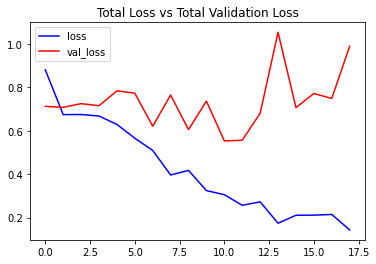

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict([X_test], batch_size=5)


y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.72      0.87      0.79        15

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.76        30
weighted avg       0.78      0.77      0.76        30



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(y_pred,y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class(non violent)', 'class(violent)'], yticklabels=['class(non violent)','class(violent)'], annot=True)

NameError: ignored

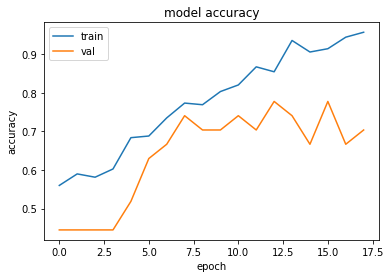

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

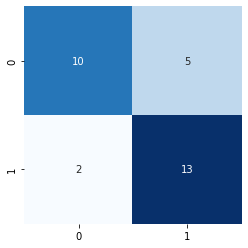

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)